In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from math import pi, cos, sin
golden_ratio = (1 + 5 ** 0.5) / 2

In [9]:
exterior = np.arange(5)
interior = exterior+5

coordinates = {}
for i in range(5):
    coordinates[exterior[i]] = (golden_ratio**2 *cos(i*2*pi/5+pi/2), golden_ratio**2 *sin(i*2*pi/5+pi/2))
    coordinates[interior[i]] = (cos((i-2)*2*pi/5+3*pi/2), sin((i-2)*2*pi/5+3*pi/2))

In [10]:
adjacency = np.zeros((10,10)).astype(int)

for i in range(5):
    adjacency[interior[i],interior[(i+1)%5]] += 1
    adjacency[interior[i],exterior[i]] += 1
    adjacency[interior[i],exterior[(i+1)%5]] += 1
adjacency += adjacency.T
adjacency

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 0]])

In [13]:
print(r"\newcommand{\coords}{")
for i in range(10):
    remove_last_comma = "," if i < 10-1 else ""
    print("\t"+str(coordinates[i])+ remove_last_comma)
print(r"}")

print(r"\newcommand{\adjmatrix}{")
text = str(adjacency)[1:-1]
text = text.replace("]", "},")
text = text.replace("\n ", "\n")
text = text.replace("[", "\t{")
text = text.replace(" ", ", ")
print(text)
print("}")

print(r"\newcommand{\labelmatrix}{")
text = str(adjacency)[1:-1]
text = text.replace("]", "},")
text = text.replace("\n ", "\n")
text = text.replace("[", "\t{")
text = text.replace(" ", ", ")
print(text)
print("}")

\newcommand{\coords}{
	(1.6030834721907683e-16, 2.618033988749895),
	(-2.48989828488278, 0.8090169943749477),
	(-1.538841768587627, -2.1180339887498945),
	(1.5388417685876261, -2.1180339887498953),
	(2.4898982848827806, 0.8090169943749468),
	(-0.587785252292473, 0.8090169943749475),
	(-0.9510565162951536, -0.3090169943749473),
	(-1.8369701987210297e-16, -1.0),
	(0.9510565162951535, -0.3090169943749476),
	(0.5877852522924734, 0.8090169943749472)
}
\newcommand{\adjmatrix}{
	{0, 0, 0, 0, 0, 1, 0, 0, 0, 1},
	{0, 0, 0, 0, 0, 1, 1, 0, 0, 0},
	{0, 0, 0, 0, 0, 0, 1, 1, 0, 0},
	{0, 0, 0, 0, 0, 0, 0, 1, 1, 0},
	{0, 0, 0, 0, 0, 0, 0, 0, 1, 1},
	{1, 1, 0, 0, 0, 0, 1, 0, 0, 1},
	{0, 1, 1, 0, 0, 1, 0, 1, 0, 0},
	{0, 0, 1, 1, 0, 0, 1, 0, 1, 0},
	{0, 0, 0, 1, 1, 0, 0, 1, 0, 1},
	{1, 0, 0, 0, 1, 1, 0, 0, 1, 0},
}
\newcommand{\labelmatrix}{
	{0, 0, 0, 0, 0, 1, 0, 0, 0, 1},
	{0, 0, 0, 0, 0, 1, 1, 0, 0, 0},
	{0, 0, 0, 0, 0, 0, 1, 1, 0, 0},
	{0, 0, 0, 0, 0, 0, 0, 1, 1, 0},
	{0, 0, 0, 0, 0, 0, 0, 0, 1, 1},


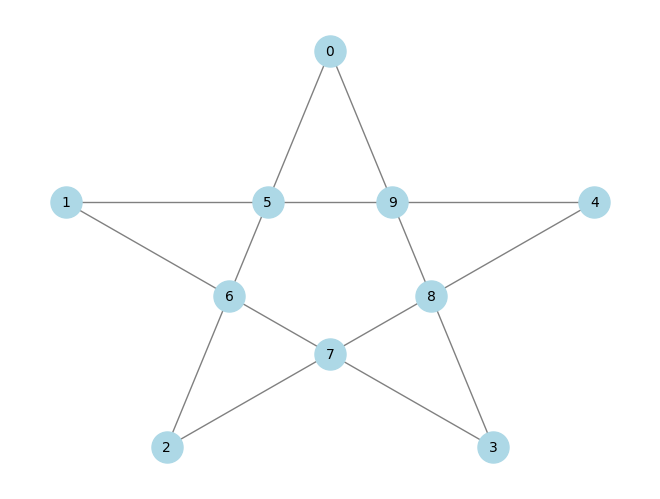

In [12]:
G = nx.from_numpy_array(adjacency)
pos = coordinates
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.show()